In [ ]:
# Loading the dataset

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [86]:
df=pd.read_csv("/content/mental_health.csv")
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [87]:
df.dtypes

,0
text,object
label,int64


In [88]:
df["label"].unique()

array([0, 1])

In [89]:
msg=df.text
msg

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...
...,...
27972,posting everyday people stop caring religion ...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


In [90]:
# Removing special chars.

In [91]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...
...,...
27972,posting everyday people stop caring religion ...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


In [92]:
# Creating a word cloud

In [93]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

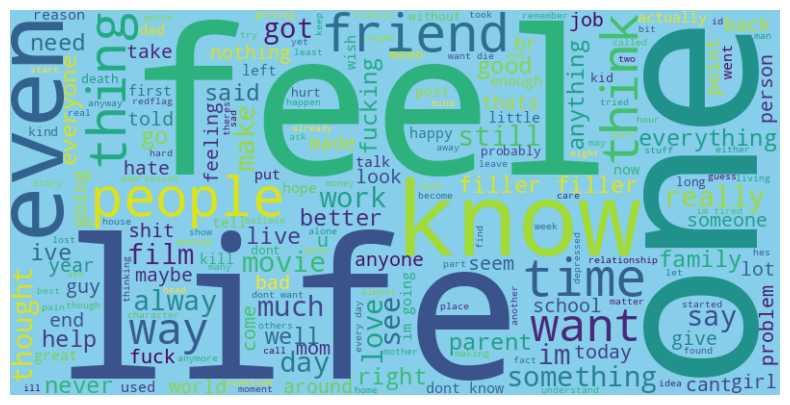

In [94]:
# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='skyblue').generate(text_corpus)
# Displaying the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
# Tokenization

In [96]:
import spacy

In [97]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 135.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [98]:
def spacy_preprocess(text):
    doc = nlp(str(text))
    return " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

In [99]:
df['processed_text'] = msg.apply(spacy_preprocess)

In [100]:
df[['text', 'processed_text']].head()

,text,processed_text
0,dear american teens question dutch person hear...,dear american teen question dutch person hear ...
1,nothing look forward lifei dont many reasons k...,look forward lifei not reason going feel like ...
2,music recommendations im looking expand playli...,music recommendation m look expand playlist us...
3,im done trying feel betterthe reason im still ...,m try feel betterthe reason m alive know mum d...
4,worried year old girl subject domestic physic...,worry year old girl subject domestic physica...


In [101]:
# Encode Labels

In [102]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
print(label_encoder.classes_)

[0 1]


In [103]:
# Train/Test Split

In [104]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [105]:
# Vectorize Text using TF-IDF

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [107]:
# Training Classifier (LR)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
target_names = list(label_encoder.classes_)

model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [109]:
target_names = [str(label) for label in label_encoder.classes_]

In [110]:
target_names = sorted(df['label'].unique().astype(str))

In [111]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2828
           1       0.92      0.90      0.91      2768

    accuracy                           0.91      5596
   macro avg       0.92      0.91      0.91      5596
weighted avg       0.92      0.91      0.91      5596



In [112]:
## Confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [115]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [117]:
labels = list(label_encoder.classes_)

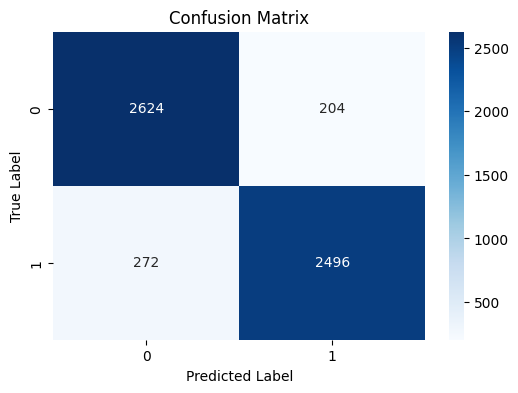

In [118]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

2624 True Negatives: Class 0 correctly identified as class 0

204 False Positives: Class 0 mistakenly identified as class 1

272 False Negatives: Class 1 mistakenly identified as class 0

2496 True Positives: Class 1 correctly identified as class 1

Performance Summary:

Accuracy:
(2624+2496)/(2624+204+272+2496) ≈ 0.91 (or 91%)

Precision (for class 1):
2496 / (204 + 2496) ≈ 0.92

Recall (for class 1):
2496 / (2496 + 272) ≈ 0.9

## Example

In [120]:
# Sample for prediction
new_text = ["wish people family owned cats dogs like  cousins million nd amp rd cousins like  aunts uncles none pets like how nearly classmates least  family member pet im one family genuinely loves animals understand cousins living situation unable pets rich cousins"]

# Preprocess using the same spaCy function
preprocessed = [spacy_preprocess(new_text[0])]

# Transform using TF-IDF
X_new = tfidf.transform(preprocessed)

# Predict using your model
y_new = model.predict(X_new)

# Output
if y_new[0] == 1:
    print("positive")
else:
    print("negative")

negative


0 = negative class ("non-mental health issue")

1 = positive class ("mental health concern")